
# Importar bibliotecas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn==1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [ ]:
#Instalação de Bibliotecas
!pip install lazypredict
#!pip install scipy==1.7.1

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Carregar Arquivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Aquisição de dados


In [ ]:
#Import de dados

# Caminho do arquivo no Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Base_Dados_TCC.xlsx'

# Ler o arquivo Excel
df_EMB = pd.read_excel (file_path, sheet_name='Base_Embarques', header=0)
df_TML = pd.read_excel(file_path, sheet_name='Base_TML', header=0)
df_QUAL = pd.read_excel(file_path, sheet_name='Base_Qualidade', header=0)


## Visualização de dados

In [ ]:
# Visualização dos dados de embarque
df_EMB

,ID_Embarque,Data DTR,Produto,Ton. Emb.
0,202012459AAAASDM,02/01/2021,AAAA,83609
1,202011909AAAAITC,02/01/2021,AAAA,205900
2,202110126AAAAITC,02/01/2021,AAAA,390119
3,202012039AAAAITC,03/01/2021,AAAA,202300
4,202012338AAAAITC,03/01/2021,AAAA,392417
...,...,...,...,...
2370,202411079JJJJITC,06/08/2024,JJJJ,175502
2371,202411062DDDDITC,06/08/2024,DDDD,392553
2372,202411011AAAAITC,07/08/2024,AAAA,292978
2373,202411103DDDDITC,07/08/2024,DDDD,390200


In [ ]:
#Visualização dos dados de TML
df_TML.head(5)

,ID_Embarque,TML_LAB
0,202110126AAAAITC,9.14
1,202012037GGGGUSV,9.13
2,202110137AAAAITC,8.97
3,202012185AAAABIS,9.34
4,202011984AAAAITC,9.00


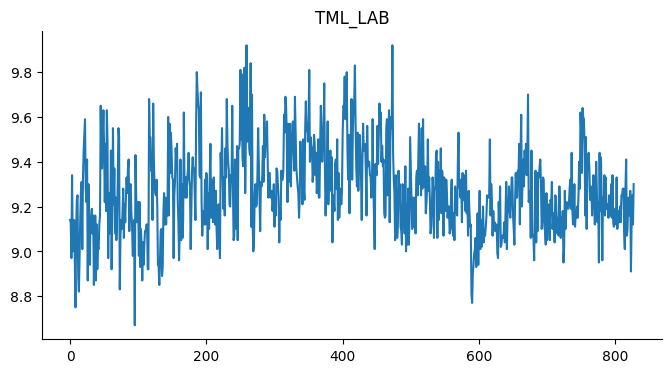

In [ ]:
# @title TML_LAB

from matplotlib import pyplot as plt
df_TML['TML_LAB'].plot(kind='line', figsize=(8, 4), title='TML_LAB')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
fig = px.box(df_TML, y="TML_LAB", labels={'TML_LAB': 'TML'})
fig.update_layout(title_text='Boxplot de TML_LAB')
fig.show()

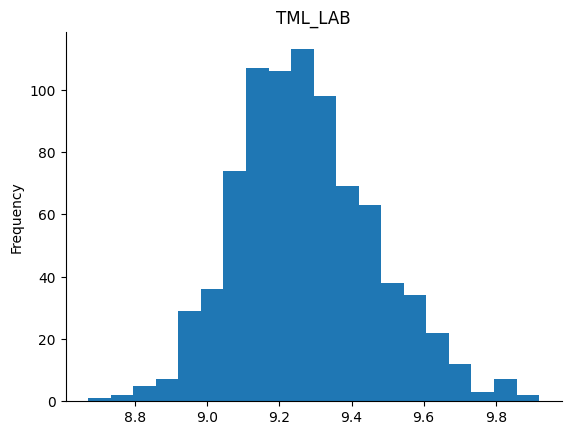

In [ ]:
# @title TML_LAB

from matplotlib import pyplot as plt
# Ensure the 'TML_LAB' column is of numeric type.
df_TML['TML_LAB'] = pd.to_numeric(df_TML['TML_LAB'])
df_TML['TML_LAB'].plot(kind='hist', bins=20, title='TML_LAB')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Visualização dos dados de Qualidade
df_QUAL

,ID_Embarque,FE,SIO2,AL2O3,P,MN,TIO2,PPC,H2O,"+6,3",...,"6,3",4,2,1,"0,5","0,25","0,15",%_SFCK,%_SFLS,%_FCSS
0,202012459AAAASDM,65.32,2.05,1.29,0.06,0.14,0.11,2.77,7.87,15.14,...,5.76,10.01,13.11,11.66,10.09,9.71,7.19,35.38,14.36,48.49
1,202011909AAAAITC,65.02,2.21,1.35,0.06,0.19,0.10,2.72,7.82,17.27,...,6.51,9.73,12.49,11.21,9.50,9.56,7.24,32.22,25.93,41.02
2,202110126AAAAITC,65.35,1.83,1.19,0.07,0.14,0.11,2.88,7.86,14.60,...,5.16,9.98,13.25,11.61,9.68,9.24,7.18,32.49,13.65,52.98
3,202012039AAAAITC,65.19,1.95,1.14,0.06,0.25,0.10,2.91,7.20,15.20,...,5.41,10.44,13.11,14.76,8.99,8.24,9.00,28.08,27.26,43.46
4,202012338AAAAITC,65.47,1.99,1.18,0.06,0.18,0.09,2.64,7.60,14.64,...,5.44,10.54,13.82,11.90,9.94,9.75,7.38,32.55,28.53,37.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,202411090AAAAITC,64.92,2.25,1.62,0.05,0.28,0.12,2.32,6.83,16.64,...,4.58,7.47,11.38,11.40,12.63,10.50,8.68,39.72,13.39,37.31
2278,202411062DDDDITC,65.58,1.90,1.44,0.04,0.25,0.09,2.27,7.06,15.71,...,4.26,6.68,10.91,11.83,13.48,10.92,9.36,40.50,7.46,47.96
2279,202411011AAAAITC,65.94,1.59,1.32,0.04,0.23,0.09,2.14,6.83,15.96,...,4.49,7.40,11.92,11.91,12.94,10.20,8.77,44.31,4.48,44.72
2280,202411103DDDDITC,65.53,2.09,1.40,0.04,0.26,0.09,2.13,6.76,15.78,...,4.93,7.09,11.53,10.84,11.93,9.92,9.00,37.24,4.55,51.20


Pré-processamento de dados

In [ ]:
# Relacionar os dataframes df_EMB, df_QUAL e df_TML pela coluna ID_Embarque

# Merge df_EMB e df_QUAL por ID_Embarque
df_merged = pd.merge(df_EMB, df_TML, on='ID_Embarque', how='inner')

# Merge do resultado com df_TML basado no ID_Embarque
df_final = pd.merge(df_merged, df_QUAL, on='ID_Embarque', how='inner')

# Agora df_final contem todos os dados dos tres dataframes
df_final


,ID_Embarque,Data DTR,Produto,Ton. Emb.,TML_LAB,FE,SIO2,AL2O3,P,MN,...,"6,3",4,2,1,"0,5","0,25","0,15",%_SFCK,%_SFLS,%_FCSS
0,202110126AAAAITC,02/01/2021,AAAA,390119,9.14,65.35,1.83,1.19,0.07,0.14,...,5.16,9.98,13.25,11.61,9.68,9.24,7.18,32.49,13.65,52.98
1,202012037GGGGUSV,04/01/2021,GGGG,75219,9.13,65.58,1.57,1.05,0.06,0.31,...,5.46,10.90,13.60,11.72,9.23,9.68,7.72,30.08,27.24,42.61
2,202110137AAAAITC,05/01/2021,AAAA,390233,8.97,65.43,1.85,1.08,0.05,0.24,...,5.14,9.84,13.01,11.55,10.39,9.77,7.14,37.36,17.92,44.04
3,202012185AAAABIS,07/01/2021,AAAA,228710,9.34,65.11,2.12,1.27,0.07,0.24,...,4.84,10.45,13.49,12.75,10.26,9.37,5.35,27.10,19.43,48.89
4,202011984AAAAITC,09/01/2021,AAAA,319909,9.00,65.29,1.67,1.15,0.07,0.24,...,5.11,9.90,13.33,13.03,10.19,8.98,7.33,30.01,12.57,56.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,202411076AAAAITC,28/07/2024,AAAA,22000,8.91,66.10,1.52,1.03,0.05,0.10,...,4.05,6.89,9.94,10.33,10.91,9.97,8.12,33.67,0.29,65.15
822,202411108KKKKCPC,30/07/2024,KKKK,116046,9.13,65.89,1.88,1.21,0.04,0.17,...,5.16,8.69,12.85,12.07,11.35,9.91,8.34,31.01,0.29,62.49
823,202411146AAAANSM,31/07/2024,AAAA,320815,9.25,64.69,2.48,1.75,0.06,0.24,...,4.23,7.23,11.86,10.79,11.79,10.12,7.23,15.18,13.49,60.59
824,202411074AAAAITC,01/08/2024,AAAA,173054,9.12,65.23,1.95,1.84,0.05,0.16,...,3.80,6.34,9.84,10.64,12.45,10.92,9.77,26.81,5.26,65.11


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Embarque  826 non-null    object 
 1   Data DTR     826 non-null    object 
 2   Produto      826 non-null    object 
 3   Ton. Emb.    826 non-null    int64  
 4   TML_LAB      826 non-null    float64
 5   FE           826 non-null    float64
 6   SIO2         826 non-null    float64
 7   AL2O3        826 non-null    float64
 8   P            826 non-null    float64
 9   MN           826 non-null    float64
 10  TIO2         826 non-null    float64
 11  PPC          826 non-null    float64
 12  H2O          826 non-null    float64
 13  +6,3         826 non-null    float64
 14  +1           826 non-null    float64
 15  -0,15        826 non-null    float64
 16  25           826 non-null    float64
 17  19           826 non-null    float64
 18  16           826 non-null    float64
 19  12,5    

In [ ]:
# Filtrar Produto = AAAA para eliminar eventual interferência na aderência do modelo em função do produto

df_final = df_final[df_final['Produto'] == 'AAAA']


In [ ]:
df_final

,ID_Embarque,Data DTR,Produto,Ton. Emb.,TML_LAB,FE,SIO2,AL2O3,P,MN,...,"6,3",4,2,1,"0,5","0,25","0,15",%_SFCK,%_SFLS,%_FCSS
0,202110126AAAAITC,02/01/2021,AAAA,390119,9.14,65.35,1.83,1.19,0.07,0.14,...,5.16,9.98,13.25,11.61,9.68,9.24,7.18,32.49,13.65,52.98
2,202110137AAAAITC,05/01/2021,AAAA,390233,8.97,65.43,1.85,1.08,0.05,0.24,...,5.14,9.84,13.01,11.55,10.39,9.77,7.14,37.36,17.92,44.04
3,202012185AAAABIS,07/01/2021,AAAA,228710,9.34,65.11,2.12,1.27,0.07,0.24,...,4.84,10.45,13.49,12.75,10.26,9.37,5.35,27.10,19.43,48.89
4,202011984AAAAITC,09/01/2021,AAAA,319909,9.00,65.29,1.67,1.15,0.07,0.24,...,5.11,9.90,13.33,13.03,10.19,8.98,7.33,30.01,12.57,56.77
6,202110215AAAAHOO,13/01/2021,AAAA,159901,9.14,64.92,1.75,1.32,0.08,0.37,...,4.94,10.38,13.02,13.50,10.41,9.20,6.64,30.41,35.07,33.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,202411125AAAACSI,24/07/2024,AAAA,55403,9.19,65.17,2.31,1.38,0.05,0.18,...,4.65,6.41,10.69,10.61,11.55,10.66,8.63,26.60,6.47,62.86
820,202411139AAAAPSC,26/07/2024,AAAA,205532,9.27,65.85,1.90,1.05,0.04,0.17,...,3.83,5.59,9.92,10.55,11.44,11.36,9.44,19.77,10.53,66.83
821,202411076AAAAITC,28/07/2024,AAAA,22000,8.91,66.10,1.52,1.03,0.05,0.10,...,4.05,6.89,9.94,10.33,10.91,9.97,8.12,33.67,0.29,65.15
823,202411146AAAANSM,31/07/2024,AAAA,320815,9.25,64.69,2.48,1.75,0.06,0.24,...,4.23,7.23,11.86,10.79,11.79,10.12,7.23,15.18,13.49,60.59


In [ ]:
# removendo outliers do df_final

# Calculo do IQR
Q1 = df_final['TML_LAB'].quantile(0.25)
Q3 = df_final['TML_LAB'].quantile(0.75)
IQR = Q3 - Q1

# Definição dos limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo outliers
df_final_no_outliers = df_final[(df_final['TML_LAB'] >= lower_bound) & (df_final['TML_LAB'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df_final)}")
print(f"Number of rows after removing outliers: {len(df_final_no_outliers)}")


Number of rows before removing outliers: 489
Number of rows after removing outliers: 483


In [ ]:
df_final = df_final_no_outliers

In [ ]:
df_final

,ID_Embarque,Data DTR,Produto,Ton. Emb.,TML_LAB,FE,SIO2,AL2O3,P,MN,...,"6,3",4,2,1,"0,5","0,25","0,15",%_SFCK,%_SFLS,%_FCSS
0,202110126AAAAITC,02/01/2021,AAAA,390119,9.14,65.35,1.83,1.19,0.07,0.14,...,5.16,9.98,13.25,11.61,9.68,9.24,7.18,32.49,13.65,52.98
2,202110137AAAAITC,05/01/2021,AAAA,390233,8.97,65.43,1.85,1.08,0.05,0.24,...,5.14,9.84,13.01,11.55,10.39,9.77,7.14,37.36,17.92,44.04
3,202012185AAAABIS,07/01/2021,AAAA,228710,9.34,65.11,2.12,1.27,0.07,0.24,...,4.84,10.45,13.49,12.75,10.26,9.37,5.35,27.10,19.43,48.89
4,202011984AAAAITC,09/01/2021,AAAA,319909,9.00,65.29,1.67,1.15,0.07,0.24,...,5.11,9.90,13.33,13.03,10.19,8.98,7.33,30.01,12.57,56.77
6,202110215AAAAHOO,13/01/2021,AAAA,159901,9.14,64.92,1.75,1.32,0.08,0.37,...,4.94,10.38,13.02,13.50,10.41,9.20,6.64,30.41,35.07,33.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,202411125AAAACSI,24/07/2024,AAAA,55403,9.19,65.17,2.31,1.38,0.05,0.18,...,4.65,6.41,10.69,10.61,11.55,10.66,8.63,26.60,6.47,62.86
820,202411139AAAAPSC,26/07/2024,AAAA,205532,9.27,65.85,1.90,1.05,0.04,0.17,...,3.83,5.59,9.92,10.55,11.44,11.36,9.44,19.77,10.53,66.83
821,202411076AAAAITC,28/07/2024,AAAA,22000,8.91,66.10,1.52,1.03,0.05,0.10,...,4.05,6.89,9.94,10.33,10.91,9.97,8.12,33.67,0.29,65.15
823,202411146AAAANSM,31/07/2024,AAAA,320815,9.25,64.69,2.48,1.75,0.06,0.24,...,4.23,7.23,11.86,10.79,11.79,10.12,7.23,15.18,13.49,60.59


In [ ]:
df_Analise = df_final

In [ ]:
#renomear a colune data dtr para data
df_Analise = df_Analise.rename(columns={'Data DTR': 'Data'})

In [ ]:
# converter a coluna DateTime para o formato conveniente
# df_Analise['Data'] = pd.to_datetime(df_Analise['Data'])

In [ ]:
#Definir campo de Data como Index
df_Analise = df_Analise.set_index('Data')

In [ ]:
# Excluir ID_Embarque e ano do df_final

df_Analise = df_Analise.drop(['ID_Embarque', 'Produto','Ton. Emb.'], axis=1)


In [ ]:
df_Analise

,TML_LAB,FE,SIO2,AL2O3,P,MN,TIO2,PPC,H2O,"+6,3",...,"6,3",4,2,1,"0,5","0,25","0,15",%_SFCK,%_SFLS,%_FCSS
Data,,,,,,,,,,,,,,,,,,,,,
02/01/2021,9.14,65.35,1.83,1.19,0.07,0.14,0.11,2.88,7.86,14.60,...,5.16,9.98,13.25,11.61,9.68,9.24,7.18,32.49,13.65,52.98
05/01/2021,8.97,65.43,1.85,1.08,0.05,0.24,0.12,2.58,7.54,15.78,...,5.14,9.84,13.01,11.55,10.39,9.77,7.14,37.36,17.92,44.04
07/01/2021,9.34,65.11,2.12,1.27,0.07,0.24,0.11,2.86,7.43,14.65,...,4.84,10.45,13.49,12.75,10.26,9.37,5.35,27.10,19.43,48.89
09/01/2021,9.00,65.29,1.67,1.15,0.07,0.24,0.15,2.98,7.54,15.99,...,5.11,9.90,13.33,13.03,10.19,8.98,7.33,30.01,12.57,56.77
13/01/2021,9.14,64.92,1.75,1.32,0.08,0.37,0.12,2.96,7.49,15.47,...,4.94,10.38,13.02,13.50,10.41,9.20,6.64,30.41,35.07,33.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/07/2024,9.19,65.17,2.31,1.38,0.05,0.18,0.02,2.38,6.57,16.57,...,4.65,6.41,10.69,10.61,11.55,10.66,8.63,26.60,6.47,62.86
26/07/2024,9.27,65.85,1.90,1.05,0.04,0.17,0.09,2.46,6.34,13.62,...,3.83,5.59,9.92,10.55,11.44,11.36,9.44,19.77,10.53,66.83
28/07/2024,8.91,66.10,1.52,1.03,0.05,0.10,0.06,2.41,5.93,18.25,...,4.05,6.89,9.94,10.33,10.91,9.97,8.12,33.67,0.29,65.15


In [ ]:
df_Analise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 02/01/2021 to 01/08/2024
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TML_LAB  483 non-null    float64
 1   FE       483 non-null    float64
 2   SIO2     483 non-null    float64
 3   AL2O3    483 non-null    float64
 4   P        483 non-null    float64
 5   MN       483 non-null    float64
 6   TIO2     483 non-null    float64
 7   PPC      483 non-null    float64
 8   H2O      483 non-null    float64
 9   +6,3     483 non-null    float64
 10  +1       483 non-null    float64
 11  -0,15    483 non-null    float64
 12  25       483 non-null    float64
 13  19       483 non-null    float64
 14  16       483 non-null    float64
 15  12,5     483 non-null    float64
 16  10       483 non-null    float64
 17  8        483 non-null    float64
 18  6,3      483 non-null    float64
 19  4        483 non-null    float64
 20  2        483 non-null    float64
 21  1    

<Axes: >

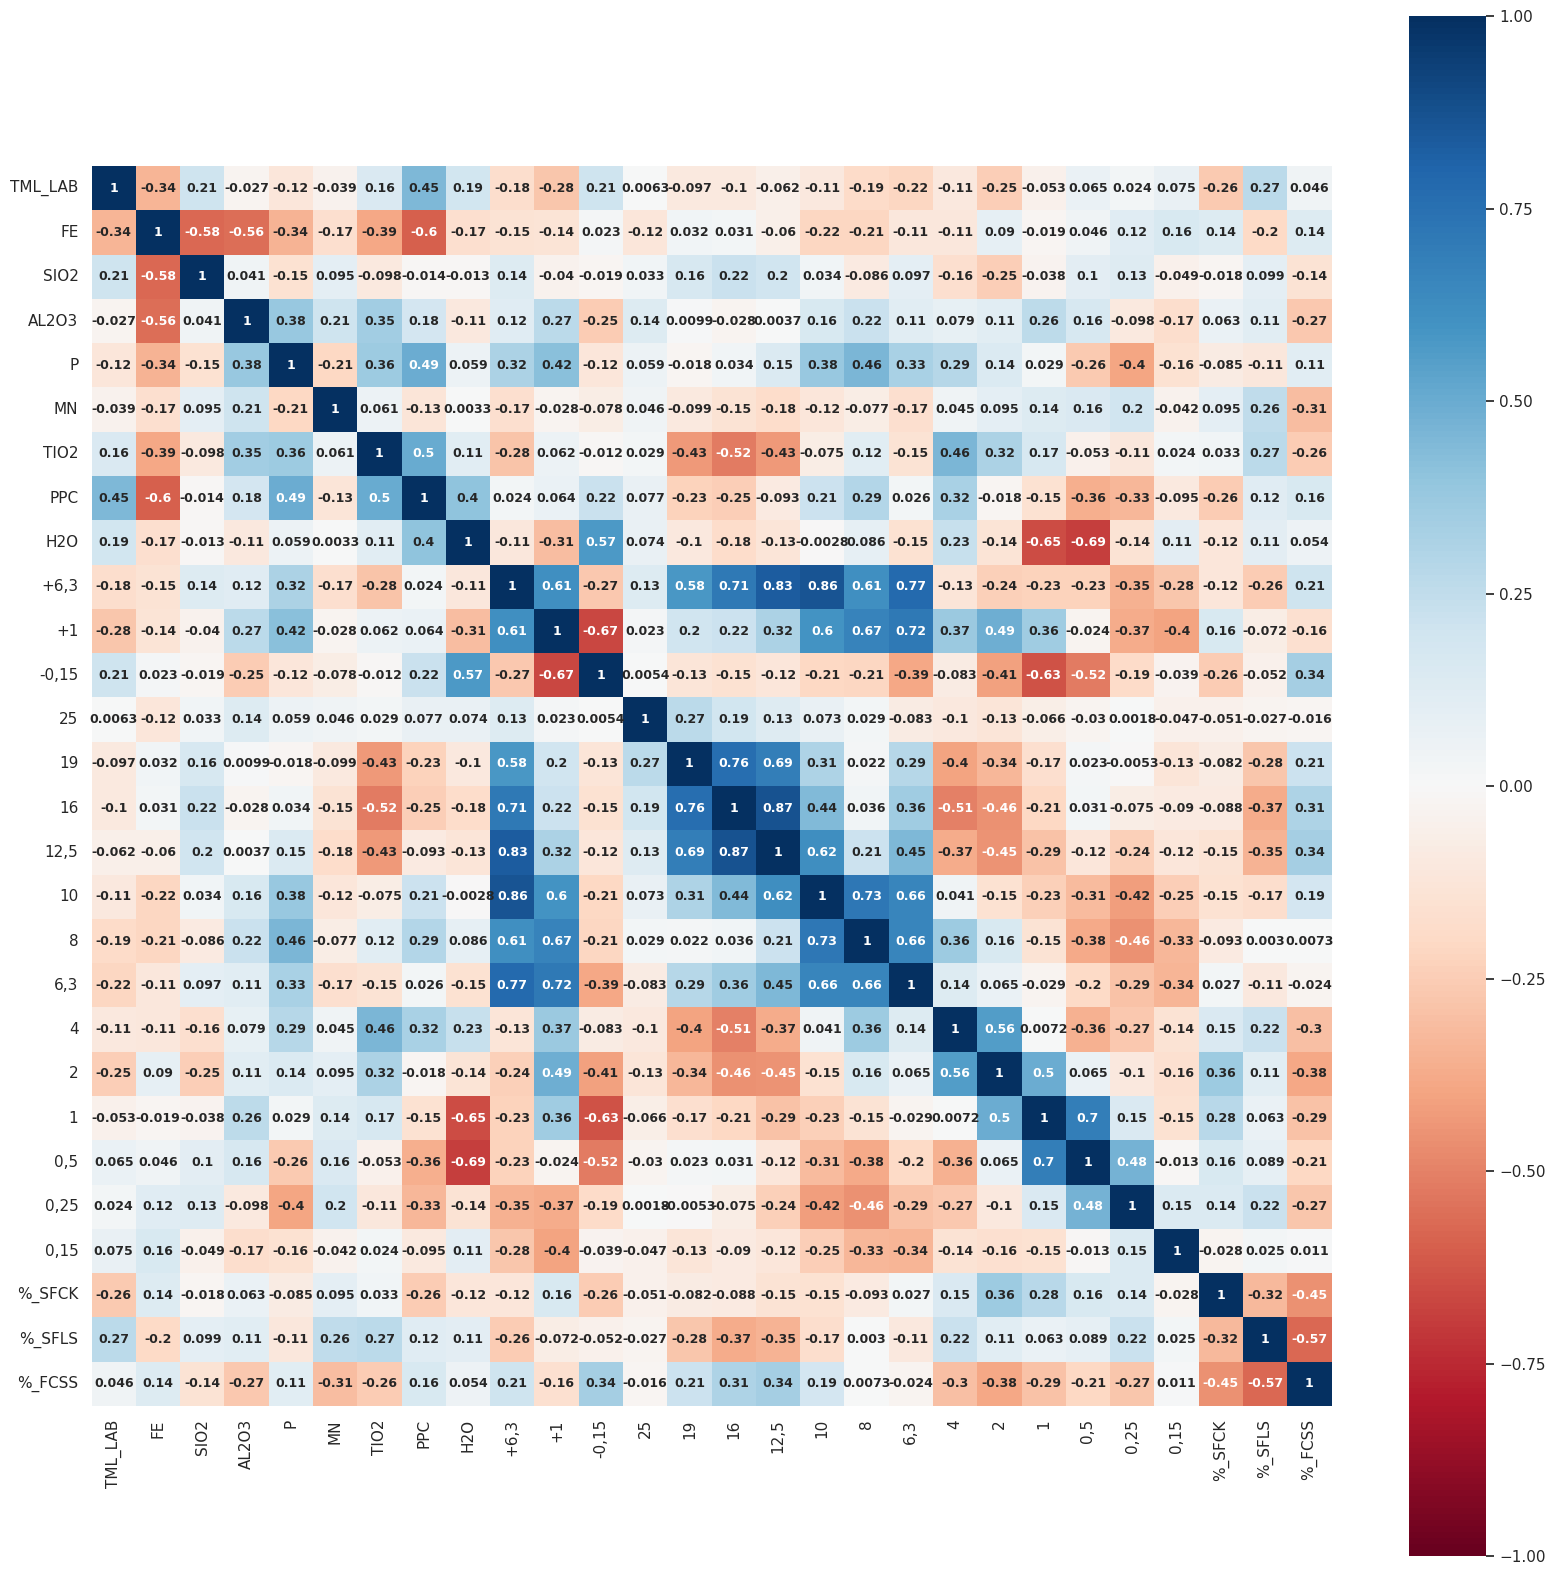

In [ ]:
##Criação da tabela de correlação das variáveis de qualidade com o TML
sns.set (rc = {'figure.figsize':(20, 20)})
sns.heatmap(df_Analise.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':9, 'fontweight':'bold'}, square=True)

            TML_LAB    FE  SIO2  PPC  +6,3    +1  -0,15    8     2  %_SFCK  \
Data                                                                         
02/01/2021     9.14 65.35  1.83 2.88 14.60 49.44  24.46 4.28 13.25   32.49   
05/01/2021     8.97 65.43  1.85 2.58 15.78 50.18  22.52 4.48 13.01   37.36   
07/01/2021     9.34 65.11  2.12 2.86 14.65 51.34  23.68 4.33 13.49   27.10   
09/01/2021     9.00 65.29  1.67 2.98 15.99 52.25  21.25 4.74 13.33   30.01   
13/01/2021     9.14 64.92  1.75 2.96 15.47 52.37  21.38 4.72 13.02   30.41   
...             ...   ...   ...  ...   ...   ...    ...  ...   ...     ...   
24/07/2024     9.19 65.17  2.31 2.38 16.57 44.28  24.88 3.79 10.69   26.60   
26/07/2024     9.27 65.85  1.90 2.46 13.62 39.68  28.08 2.98  9.92   19.77   
28/07/2024     8.91 66.10  1.52 2.41 18.25 45.41  25.59 3.89  9.94   33.67   
31/07/2024     9.25 64.69  2.48 2.51 17.58 47.46  23.40 4.03 11.86   15.18   
01/08/2024     9.12 65.23  1.95 2.46 14.04 40.86  26.00 3.13  9.

<Axes: >

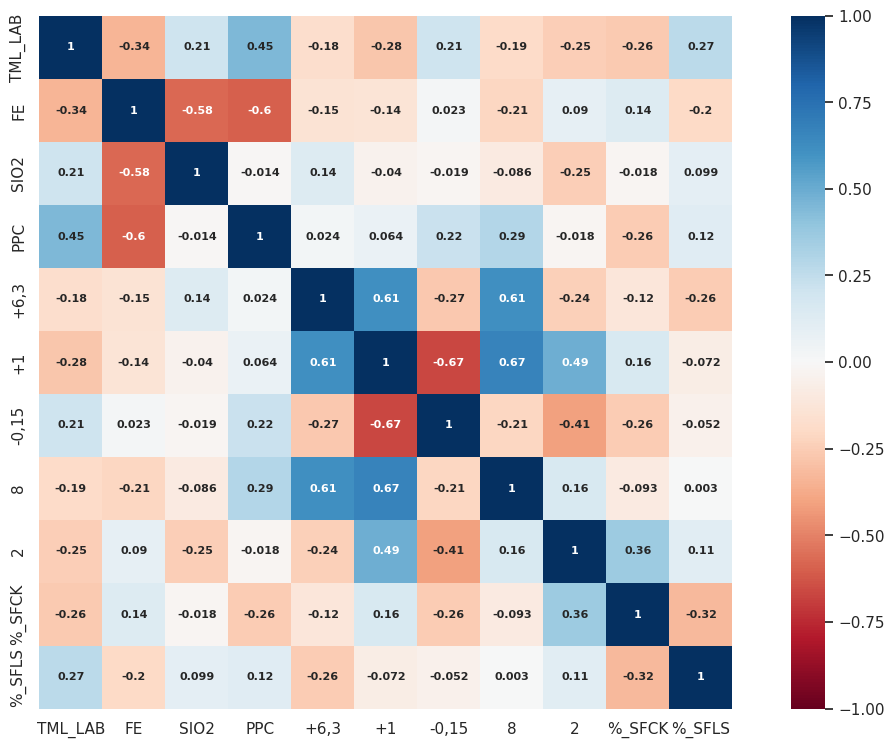

In [ ]:
###Dataframe final com a exclusão dos indicadores com baixa correlação
##Atribuição do dataframe na variável para avaliação das correlações com os indicadores
df = df_Analise

##Exclusão dos atributos que não correspondem aos indicadores
df = df.drop(['AL2O3','P','MN','TIO2','25','19','16','12,5','10','6,3','4','1','0,5','0,25','0,15','H2O','%_FCSS'], axis=1)
# df = df.drop(['AL2O3','MN','25','19','16','12,5','1','0,5','0,25','0,15','H2O','%_FCSS'], axis=1)
# df = df.drop(['AL2O3','MN','25','19','12,5','H2O','16','10','4','1','0,5','0,25','0,15'], axis=1)

print(df)

##Criação da tabela de correção das variáveis de indicadores com o descarregamento realizado
sns.set (rc = {'figure.figsize':(15, 9)})
sns.heatmap(df.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':8, 'fontweight':'bold'}, square=True)

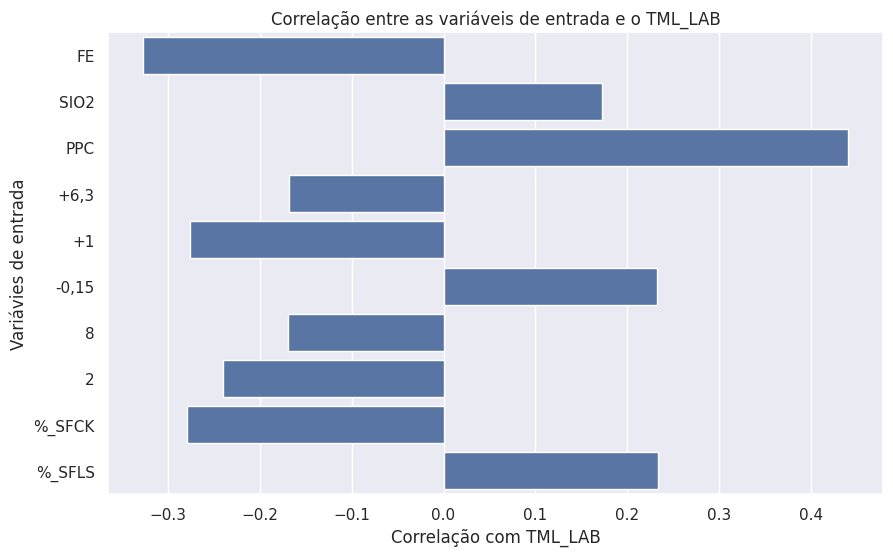

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Selecionar a correlação da variável de saída (TML_LAB) com as variáveis de entrada
correlation_with_tml = correlation_matrix['TML_LAB'].drop('TML_LAB')

# Criar o gráfico de correlação
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_tml.values, y=correlation_with_tml.index)
plt.xlabel('Correlação com TML_LAB')
plt.ylabel('Variávies de entrada')
plt.title('Correlação entre as variáveis de entrada e o TML_LAB')
plt.show()


## Model Training and Optimization

In [ ]:
#Exclusão dos dados realizados do dataframe para não influenciar a predição com dados indevidos
X = df.drop('TML_LAB', axis=1)
Y = df['TML_LAB']

In [ ]:
X.tail()

,FE,SIO2,PPC,"+6,3",+1,"-0,15",8,2,%_SFCK,%_SFLS
Data,,,,,,,,,,
24/07/2024,65.17,2.31,2.38,16.57,44.28,24.88,3.79,10.69,26.60,6.47
26/07/2024,65.85,1.90,2.46,13.62,39.68,28.08,2.98,9.92,19.77,10.53
28/07/2024,66.10,1.52,2.41,18.25,45.41,25.59,3.89,9.94,33.67,0.29
31/07/2024,64.69,2.48,2.51,17.58,47.46,23.40,4.03,11.86,15.18,13.49
01/08/2024,65.23,1.95,2.46,14.04,40.86,26.00,3.13,9.84,26.81,5.26


In [ ]:
Y = pd.DataFrame(Y)
Y.tail()

,TML_LAB
Data,
24/07/2024,9.19
26/07/2024,9.27
28/07/2024,8.91
31/07/2024,9.25
01/08/2024,9.12


In [ ]:
# Código para testar vários modelos usando o lazypredict para regressão linear no dataframe df

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir o modelo LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Treinar e avaliar os modelos
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Imprimir os resultados
print(models)


100%|██████████| 42/42 [00:08<00:00,  4.74it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 386, number of used features: 10
[LightGBM] [Info] Start training from score 9.266736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# Avaliação do Modelo LassoCV

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Criar e treinar o modelo LassoCV
lasso_cv_model = LassoCV(cv=5, random_state=42)  # You can adjust cv as needed
lasso_cv_model.fit(X_train, y_train)

# Fazer predições com o conjunto de teste
y_pred = lasso_cv_model.predict(X_test)

# Calcular as métricas de avaliação
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.34254594070132005
Mean Absolute Error (MAE): 0.11133071023060782
Mean Absolute Percentage Error (MAPE): 0.012062173436297254
Root Mean Squared Error (RMSE): 0.1435518078138503


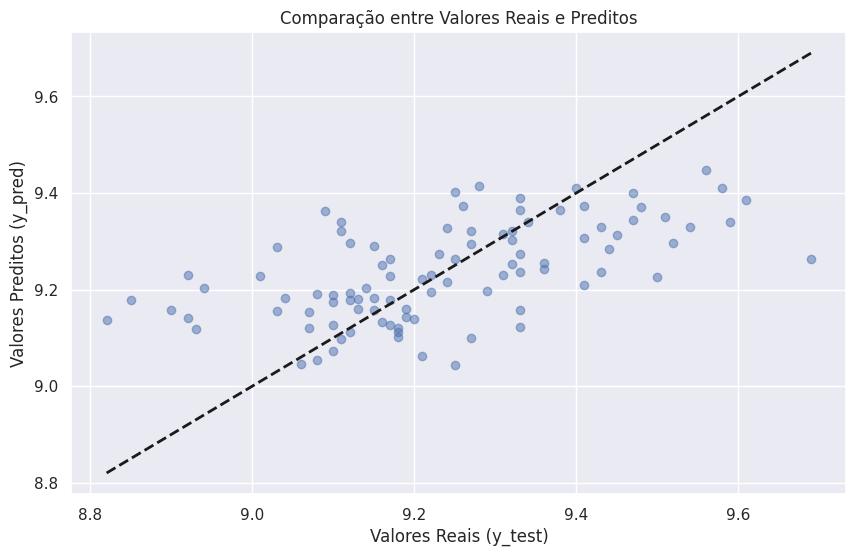

In [ ]:
# Gráfico comparando y_test com o y_pred

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred)')
plt.title('Comparação entre Valores Reais e Preditos')
plt.grid(True)
plt.show()


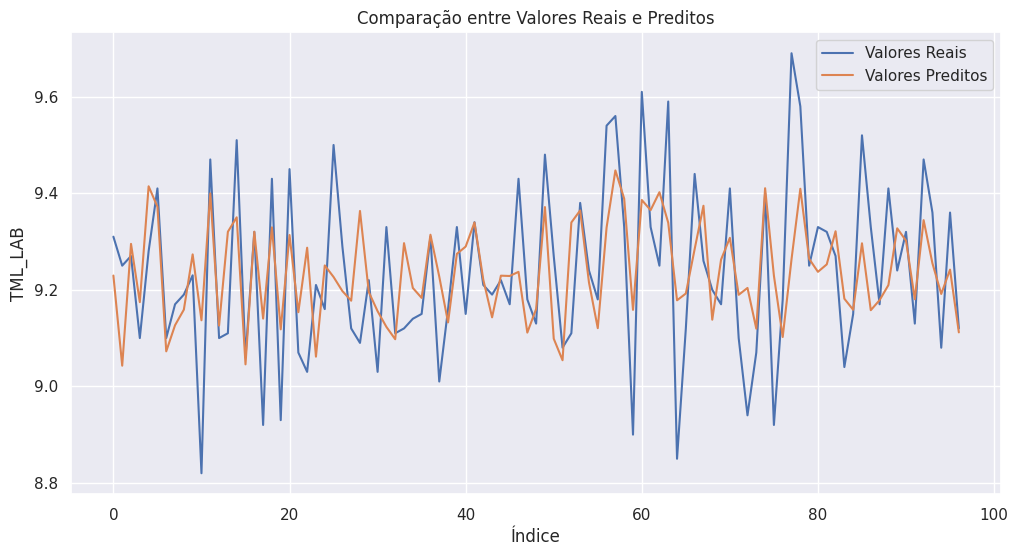

In [ ]:
# Gráfico de linha comparando y_test com o y_pred

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Preditos')
plt.xlabel('Índice')
plt.ylabel('TML_LAB')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Cross validation para verificar o desempenho do modelo LassoCV

from sklearn.model_selection import cross_val_score, cross_validate

# Criação do modelo LassoCV
lasso_cv_model = LassoCV(cv=5, random_state=42)

# Definição das métricas de score
scoring = {
    'r2': 'r2',
    'adjusted_r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error',
    'rmse': 'neg_root_mean_squared_error'
}

# Performando cross-validation
cv_results = cross_validate(lasso_cv_model, X, Y, cv=5, scoring=scoring, return_train_score=True)

# Imprimir resultados para cada fold
for i in range(5):
  print(f"Fold {i+1}:")
  print(f"  Adjusted R-squared: {cv_results['test_adjusted_r2'][i]}")
  print(f"  R-squared: {cv_results['test_r2'][i]}")
  print(f"  MAE: {-cv_results['test_mae'][i]}")
  print(f"  MAPE: {-cv_results['test_mape'][i]}")
  print(f"  RMSE: {-cv_results['test_rmse'][i]}")

# Calcular e imprimir a média dos scores para cada fold
print("\nAverage Scores:")
print(f"  Adjusted R-squared: {cv_results['test_adjusted_r2'].mean()}")
print(f"  R-squared: {cv_results['test_r2'].mean()}")
print(f"  MAE: {-cv_results['test_mae'].mean()}")
print(f"  MAPE: {-cv_results['test_mape'].mean()}")
print(f"  RMSE: {-cv_results['test_rmse'].mean()}")

Fold 1:
  Adjusted R-squared: -0.348957572605773
  R-squared: -0.348957572605773
  MAE: 0.18769012803937987
  MAPE: 0.020598709359801178
  RMSE: 0.21889126170778253
Fold 2:
  Adjusted R-squared: 0.10489320883138065
  R-squared: 0.10489320883138065
  MAE: 0.12338844751454067
  MAPE: 0.01315899967930099
  RMSE: 0.14992130885932042
Fold 3:
  Adjusted R-squared: 0.24542758996387437
  R-squared: 0.24542758996387437
  MAE: 0.11894732916473155
  MAPE: 0.012644606802663787
  RMSE: 0.1479968992015707
Fold 4:
  Adjusted R-squared: 0.23019609189499213
  R-squared: 0.23019609189499213
  MAE: 0.10371885435054057
  MAPE: 0.011307383387710215
  RMSE: 0.12901626615258327
Fold 5:
  Adjusted R-squared: 0.19397955026767355
  R-squared: 0.19397955026767355
  MAE: 0.09474757617424927
  MAPE: 0.010221506075600602
  RMSE: 0.119392582886584

Average Scores:
  Adjusted R-squared: 0.08510777367042954
  R-squared: 0.08510777367042954
  MAE: 0.12569846704868837
  MAPE: 0.013586241061015355
  RMSE: 0.1530436637615

In [ ]:
# Ajuste de hiperparâmetros do modelo LassoCV

from sklearn.model_selection import GridSearchCV

# Criar o modelo LassoCV
lasso_cv_model = LassoCV(cv=5, random_state=42)

# Definir a grade de hiperparametros grid_search
param_grid = {
    'alphas': [np.logspace(-4, 2, 10)],
    'max_iter': [1000, 2000],
    #'tol': [1e-3, 1e-4],
}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso_cv_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,  # Número de folds
    n_jobs=-1,  # Usar todos os núcleos disponíveis
)

# Ajuste o grid search aos dados de treinamento
grid_search.fit(X_train, y_train)

# Imprima os melhores hiperparametros encontrados
print("Best Hyperparameters:", grid_search.best_params_)

# Obtenha o melhor estimador do grid search
best_lasso_cv_model = grid_search.best_estimator_

# Fazer predições no conjunto de teste utilizando o melhor modelo
y_pred = best_lasso_cv_model.predict(X_test)

# Calcular métricas de avaliação
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimir resultados
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Best Hyperparameters: {'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'max_iter': 1000}
R-squared: 0.33469970604695587
Mean Absolute Error (MAE): 0.11236682508926304
Mean Absolute Percentage Error (MAPE): 0.01217380468198492
Root Mean Squared Error (RMSE): 0.14440586030810545


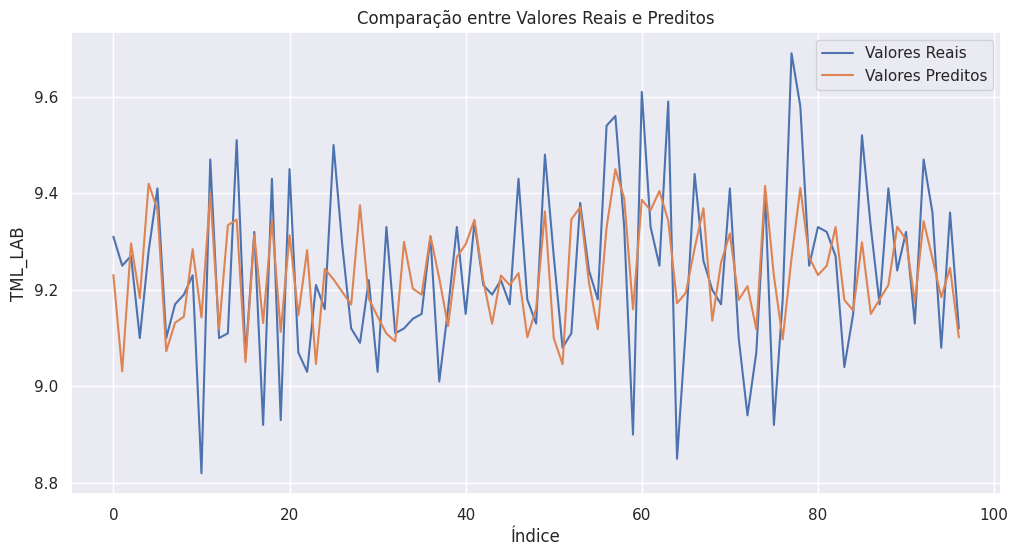

In [ ]:
# Exibindo novo gráfico prev x real após ajuste de hiperparametros
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Preditos')
plt.xlabel('Índice')
plt.ylabel('TML_LAB')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid(True)
plt.show()


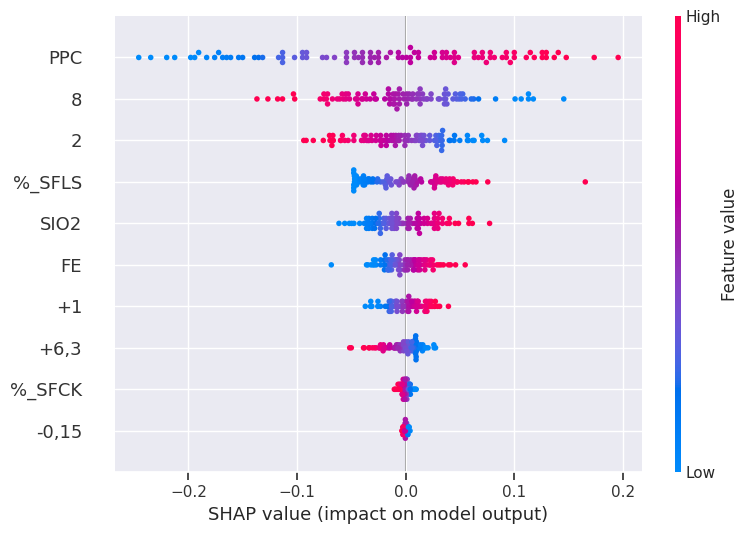

In [ ]:
# Explicação para o modelo LassoCV usando gráfico SHAP

!pip install shap

import shap

# Criação do modelo LassoCV
lasso_cv_model = LassoCV(cv=5, random_state=42)
lasso_cv_model.fit(X_train, y_train)

# SHAP explainer para o modelo
explainer = shap.Explainer(lasso_cv_model.predict, X_train)

# Valores SHAP para os dados de teste
shap_values = explainer(X_test)

# Summary plot para visualizar importância das variáveis
shap.summary_plot(shap_values, X_test)
